# 1 - Perkenalan

Nama: Imam Buchori Zarkasie

Batch: 019

Dataset: Car Price Prediction

Objective: Membuat model regresi linear untuk memprediksi harga mobil bekas.

# 2 - Import Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
import pickle ,joblib
import json

# 3 - Data Loading

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/H8-Assignments-Bay/p1-ftds019-rmt-lc1-imamzarkasie/main/car-price-prediction.csv?token=GHSAT0AAAAAACCFAJMUMIDIDRVPZZCCANLMZCYMQXQ')
df

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A4,2019,26695,Semi-Auto,5000,Diesel,145,51.4,2.0
1,Mercedez,C Class,2010,5999,Manual,68000,Diesel,145,56.5,2.1
2,Vauxhall,Meriva,2016,6790,Manual,27772,Petrol,145,47.1,1.4
3,VW,Shuttle,2019,28000,Semi-Auto,10074,Diesel,145,32.8,2.0
4,Vauxhall,Corsa,2017,7999,Manual,22322,Petrol,30,54.3,1.4
...,...,...,...,...,...,...,...,...,...,...
23995,BMW,X3,2019,31950,Semi-Auto,7721,Diesel,145,54.3,2.0
23996,Audi,Q2,2018,20500,Automatic,6734,Diesel,145,46.3,1.6
23997,Hyundai,Tucson,2019,17490,Manual,8009,Petrol,145,34.9,1.6
23998,Vauxhall,Corsa,2013,3998,Manual,58350,Petrol,125,51.4,1.2


In [4]:
#Membuat data backup
data_duplicate = df.copy()

In [5]:
#Melihat tipe data dan jumlah data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         24000 non-null  object 
 1   model         24000 non-null  object 
 2   year          24000 non-null  int64  
 3   price         24000 non-null  int64  
 4   transmission  24000 non-null  object 
 5   mileage       24000 non-null  int64  
 6   fuelType      24000 non-null  object 
 7   tax           24000 non-null  int64  
 8   mpg           24000 non-null  float64
 9   engineSize    24000 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.8+ MB


Dataset terdiri dari 10 kolom dan 24000 baris, tidak ditemukan missing value pada dataset ini.

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,2017.172000,17154.666208,22677.318208,122.455625,54.513126,1.676517
std,2.072139,9904.741481,20898.280371,60.220629,16.420648,0.552661
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,10390.000000,6981.250000,125.000000,45.600000,1.400000
50%,2017.000000,14995.000000,17155.000000,145.000000,54.300000,1.600000
75%,2019.000000,21286.250000,32093.500000,145.000000,61.400000,2.000000
max,2060.000000,140319.000000,300000.000000,580.000000,470.800000,6.200000


# 4 - Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [15]:
kategori = np.where(df['mpg'] > 60, 'super efficient',
            np.where((df['mpg'] >= 50) & (df['mpg'] < 60), 'efficient',
            np.where((df['mpg'] >= 35) & (df['mpg'] < 50), 'decent',
            np.where((df['mpg'] >= 25) & (df['mpg'] < 35), 'standard', 'not efficient'))))

In [16]:
df["efficiency"] = kategori

In [ ]:
df

In [18]:
df["efficiency"].value_counts()

super efficient    8091
decent             7677
efficient          7048
standard           1122
not efficient        62
Name: efficiency, dtype: int64

mobil dengan efisiensi paling banyak ditemukan pada kategori super efficient dengan mpg >= 60 sedangkan paling sedikit not efficient dengan jumlah 62 mobil.

<Axes: xlabel='mileage', ylabel='price'>

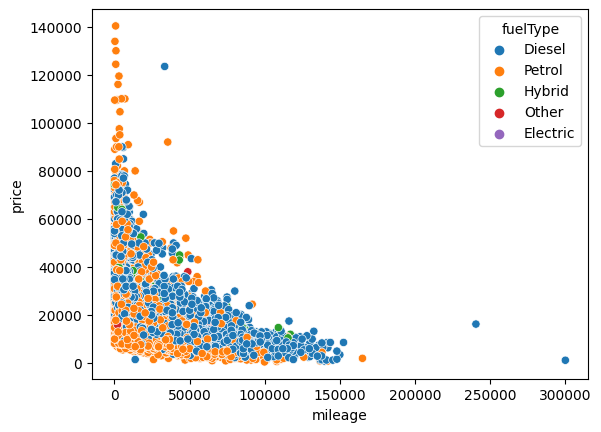

In [23]:
#Memvisualisasikan pengaruh fuelType dan mileage terhadap price
sns.scatterplot(data=df, x='mileage', y='price', hue='fuelType')

Berdasarkan scatter plot diatas nilai price berbanding terbalik dengan mileage, tetapi pada range nilai mileage yang berdekatan masih dipengaruhi oleh variabel fuelType.

Sehingga nilai price ditentukan oleh mileage dan juga fuelType dengan linearitas seperti di plot tersebut.

# 5 - Feature Engineering

## Handling Outlier

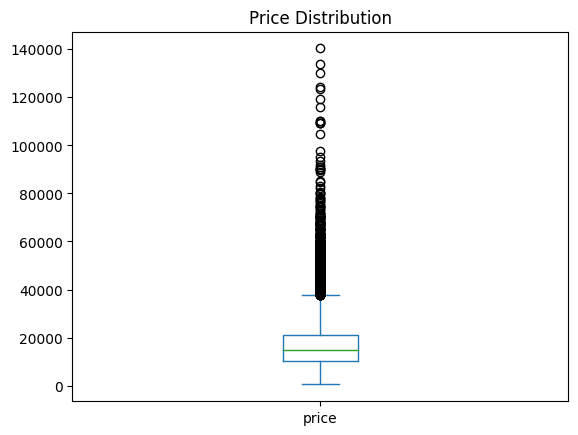

In [24]:
#Mengecek outlier pada fitur price
df['price'].plot(kind='box', title='Price Distribution');

In [25]:
#Menentukan nilai Quartil 1 dan 3
q1= df['price'].quantile(0.25)
q3= df['price'].quantile(0.75)
q1,q3

(10390.0, 21286.25)

In [26]:
#Menentukan nilai Inter Quartile range
IQR= q3-q1
IQR

10896.25

In [27]:
#Membuat nilai limit untuk outlier
upper_limit= q3 + 1.5*IQR
lower_limit=q1 - 1.5*IQR

print(upper_limit)
print(lower_limit)

37630.625
-5954.375


In [28]:
#Menunjukan jumlah df setelah outlier dihapus
df_no_outlier = df[~((df['price'] > upper_limit) | (df['price'] < lower_limit))]
df_no_outlier.shape

(23159, 11)

In [ ]:
df_no_outlier

Outlier sudah dihilangkan dengan metode IQR (Tukey Rule)

## Pembagian Data

In [29]:
# Splitting between `X` and `y`

X = df_no_outlier.drop(['price'], axis=1)
y = df_no_outlier['price']
X

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,efficiency
0,Audi,A4,2019,Semi-Auto,5000,Diesel,145,51.4,2.0,efficient
1,Mercedez,C Class,2010,Manual,68000,Diesel,145,56.5,2.1,efficient
2,Vauxhall,Meriva,2016,Manual,27772,Petrol,145,47.1,1.4,decent
3,VW,Shuttle,2019,Semi-Auto,10074,Diesel,145,32.8,2.0,standard
4,Vauxhall,Corsa,2017,Manual,22322,Petrol,30,54.3,1.4,efficient
...,...,...,...,...,...,...,...,...,...,...
23995,BMW,X3,2019,Semi-Auto,7721,Diesel,145,54.3,2.0,efficient
23996,Audi,Q2,2018,Automatic,6734,Diesel,145,46.3,1.6,decent
23997,Hyundai,Tucson,2019,Manual,8009,Petrol,145,34.9,1.6,standard
23998,Vauxhall,Corsa,2013,Manual,58350,Petrol,125,51.4,1.2,efficient


In [33]:
# Splitting between Train-Set and Test-Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (18527, 10)
Test Size  :  (4632, 10)


,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,efficiency
22846,Ford,Focus,2017,Manual,34025,Petrol,20,60.1,1.0,super efficient
21378,Skoda,Kodiaq,2019,Manual,2525,Diesel,145,52.3,2.0,efficient
11719,Hyundai,I20,2014,Manual,30750,Petrol,30,57.6,1.2,efficient
6474,Vauxhall,Astra,2016,Automatic,47700,Diesel,125,61.4,1.6,super efficient
21246,Hyundai,I30,2015,Manual,15318,Petrol,145,47.1,1.4,decent
...,...,...,...,...,...,...,...,...,...,...
12393,Ford,Focus,2019,Manual,8016,Petrol,145,58.9,1.0,efficient
22362,Audi,A3,2017,Semi-Auto,26931,Petrol,30,56.5,1.4,efficient
5585,Mercedez,C Class,2013,Automatic,43500,Petrol,160,44.8,1.6,decent
885,Skoda,Fabia,2013,Manual,48666,Diesel,20,67.3,1.2,super efficient


In [45]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['year', 'mileage', 'tax', 'mpg', 'engineSize']
Cat Columns :  ['brand', 'model', 'transmission', 'fuelType', 'efficiency']


In [48]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,year,mileage,tax,mpg,engineSize
22846,2017,34025,20,60.1,1.0
21378,2019,2525,145,52.3,2.0
11719,2014,30750,30,57.6,1.2
6474,2016,47700,125,61.4,1.6
21246,2015,15318,145,47.1,1.4
...,...,...,...,...,...
12393,2019,8016,145,58.9,1.0
22362,2017,26931,30,56.5,1.4
5585,2013,43500,160,44.8,1.6
885,2013,48666,20,67.3,1.2


## Seleksi Fitur

In [51]:
# Pilih beberapa terbaik dengan uji ANOVA
selector = SelectKBest(score_func=f_regression, k='all') #k='all'

##fit_transform langsung lakukan seleksi dgn jumlah fitur k dan simpan ke X_train_anova
# X_train_anova = selector.fit_transform(X_train_new, y_train_drop)

#tanpa transform akan tampilkan semua
selector.fit(X_train_num, y_train)

# Buat DataFrame dengan nama kolom fitur
df_scores = pd.DataFrame({'Feature': X_train_num.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

# Tampilkan DataFrame dengan fitur terurut berdasarkan skor ANOVA
df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

,Feature,Score,p-value
0,year,7396.235571,0.0
4,engineSize,7148.310619,0.0
1,mileage,4809.825268,0.0
2,tax,2685.935613,0.0
3,mpg,969.138920,0.0


In [60]:
#Menerapkan scaling dengan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train_num)

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)
X_test_scaled

array([[5.44444444e-01, 7.30541014e-02, 2.50000000e-01, 1.51799021e-01,
        2.58064516e-01],
       [5.22222222e-01, 9.02812140e-02, 0.00000000e+00, 1.60102193e-01,
        2.58064516e-01],
       [5.44444444e-01, 1.10148736e-02, 2.50000000e-01, 1.15605706e-01,
        3.22580645e-01],
       ...,
       [5.44444444e-01, 2.28655304e-02, 2.32758621e-01, 1.64786034e-01,
        2.58064516e-01],
       [5.44444444e-01, 4.07496268e-04, 2.50000000e-01, 9.96380669e-02,
        3.22580645e-01],
       [5.22222222e-01, 2.29170911e-01, 0.00000000e+00, 1.55844156e-01,
        2.58064516e-01]])

In [61]:
#Menyimpan nilai hasil scaling ke dataframe
df_train = pd.DataFrame(X_train_scaled, columns=num_columns)
df_test = pd.DataFrame(X_test_scaled, columns=num_columns)
df_train.describe()

,year,mileage,tax,mpg,engineSize
count,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000
mean,0.523436,0.096824,0.209112,0.115179,0.262961
std,0.023140,0.087380,0.104081,0.035136,0.079236
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.511111,0.031402,0.215517,0.097935,0.193548
50%,0.522222,0.074580,0.250000,0.113264,0.258065
75%,0.544444,0.136035,0.250000,0.129019,0.322581
max,1.000000,1.000000,1.000000,1.000000,1.000000


# 6 - Model Definition

In [62]:
# Training using Linear Regression

from sklearn.linear_model import LinearRegression
model_lin_reg = LinearRegression()

# 7 - Model Training

In [63]:
# Train the Model

model_lin_reg.fit(df_train, y_train)

LinearRegression()

In [64]:
# Get Intercept and Slope

print('Intercept : ', model_lin_reg.intercept_)
print('Slope     : ', model_lin_reg.coef_)

Intercept :  -63525.39597629424
Slope     :  [126464.72843575 -22873.50580692   3135.87403195   -871.76569348
  56762.91009631]


# 8 - Model Evaluation

In [65]:
# Predict Train-Set and Test-Set

y_pred_train = model_lin_reg.predict(df_train)
y_pred_test = model_lin_reg.predict(df_test)
y_pred_train

array([ 8435.17961385, 24087.12012201,  6420.94528824, ...,
        8191.86607437,  3239.70469949, 14652.49518311])

In [66]:
# Model Evaluation using MAE

from sklearn.metrics import mean_absolute_error

print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

Error - Train Set :  3171.72156823661
Error - Test Set  :  3175.46780426554


In [77]:
#Membuat dataframe perbandingan data price aktual dan prediksi
pred = pd.DataFrame({
    'actual':y_test,
    'pred':y_pred_test
})
pred.describe()

,actual,pred
count,4632.000000,4632.000000
mean,16029.873921,15997.728246
std,7361.778121,5949.313494
min,1190.000000,-17885.969087
25%,10172.500000,12069.893535
50%,14656.000000,15860.804671
75%,20490.000000,19757.147854
max,37599.000000,39704.883903


# 9 - Model Saving

In [70]:
with open('model_lin_reg.pkl', 'wb') as file_1:
  pickle.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

# 10 - Model Inference

In [74]:
# Create New Data

data_inf = {
    'year': 2019,
    'mileage': 30000,
    'tax': 130,
    'mpg': 30,
    'engineSize': 1
}

data_inf = pd.DataFrame([data_inf])
data_inf

,year,mileage,tax,mpg,engineSize
0,2019,30000,130,30,1


In [75]:
# Feature Scaling and Feature Encoding

data_inf_scaled = scaler.transform(data_inf)
data_inf_scaled

array([[0.54444444, 0.1247396 , 0.22413793, 0.06152864, 0.16129032]])

In [76]:
# Predict using Linear Regression

y_pred_inf = model_lin_reg.predict(data_inf_scaled)
y_pred_inf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12278.92877714])

# 11 - Kesimpulan dan Jawaban Pertanyaan

*   Nilai MAE dari hasil model prediksi sebesar trains-set: 3171 dan test-set :3175. dari selisih nilai MAE tersebut model sudah cukup fit dan mampu memprediksi nilai mobil bekas.
*   Dari keseluruhan test-set yang diprediksi, nilai minimum dan nilai maksimum yang diprediksi oleh model adalah sebagai berikut:
*   Actual: 
>Min: 1190 dan Max: 37599
*   test-set
>Min: -17885 dan Max: 39704
*   Data hasil prediksi Maximal berbeda sedikit dengan data aktualnya.
*   Kelemahan: akurasi dipengaruhi oleh variabel kategorik yang rawan cardinality
*   Kelebihan: akurasi mudah diimprove dengan pra-proses data input dan output yang maksimal.


